In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic plot settings
plt.figure(figsize=(10, 6))
sns.set_theme()

# Read the data, skipping the first two rows (the title and timeframe rows) and cleaning the dollar amounts
df = pd.read_csv('../data/raw/kff_healthcare_spending_per_capita_2020.csv', 
                 skiprows=2,  # Skip the title and timeframe rows
                 thousands=',',  # Handle commas in numbers
                 nrows=52)  # Read only the state data (including US)

# Clean the dollar amounts
df['Health Spending per Capita'] = df['Health Spending per Capita'].str.replace('$', '').str.replace(',', '').astype(float)

df.head()

,Location,Health Spending per Capita
0,United States,10191.0
1,Alabama,9280.0
2,Alaska,13642.0
3,Arizona,8756.0
4,Arkansas,9338.0


<Figure size 1000x600 with 0 Axes>

In [8]:
# Display basic information about the dataset
print("Dataset Overview:")
print("-----------------")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumns in dataset:")
print(df.columns.tolist())

Dataset Overview:
-----------------
Number of rows: 52
Number of columns: 2

Columns in dataset:
['Location', 'Health Spending per Capita']


In [9]:
# Display first few rows
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
        Location  Health Spending per Capita
0  United States                     10191.0
1        Alabama                      9280.0
2         Alaska                     13642.0
3        Arizona                      8756.0
4       Arkansas                      9338.0


In [10]:
# Basic statistical summary
print("\nBasic statistical summary:")
print(df.describe())


Basic statistical summary:
       Health Spending per Capita
count                   52.000000
mean                 10471.576923
std                   1618.036687
min                   7522.000000
25%                   9322.000000
50%                  10201.500000
75%                  11625.750000
max                  14381.000000


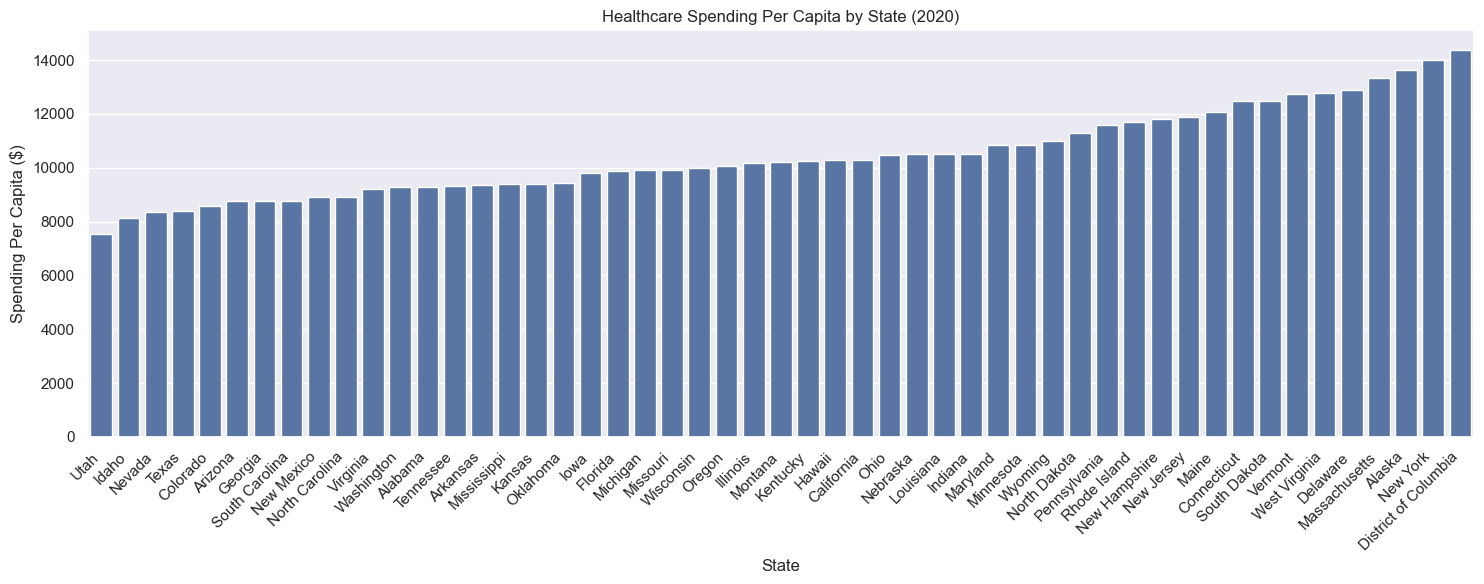

In [13]:
# Create a bar plot of healthcare spending by state (excluding US)
plt.figure(figsize=(15, 6))
state_data = df[df['Location'] != 'United States'].copy()
state_data = state_data.sort_values('Health Spending per Capita', ascending=True)

sns.barplot(data=state_data, 
            x='Location', 
            y='Health Spending per Capita')

plt.xticks(rotation=45, ha='right')
plt.title('Healthcare Spending Per Capita by State (2020)')
plt.xlabel('State')
plt.ylabel('Spending Per Capita ($)')
plt.tight_layout()
plt.show()

In [14]:
# Calculate some basic statistics
us_spending = df[df['Location'] == 'United States']['Health Spending per Capita'].values[0]
print("\nKey Statistics:")
print(f"National Average (US): ${us_spending:,.2f}")
print(f"Highest Spending State: {state_data['Location'].iloc[-1]} (${state_data['Health Spending per Capita'].max():,.2f})")
print(f"Lowest Spending State: {state_data['Location'].iloc[0]} (${state_data['Health Spending per Capita'].min():,.2f})")
print(f"State Average: ${state_data['Health Spending per Capita'].mean():,.2f}")
print(f"State Median: ${state_data['Health Spending per Capita'].median():,.2f}")


Key Statistics:
National Average (US): $10,191.00
Highest Spending State: District of Columbia ($14,381.00)
Lowest Spending State: Utah ($7,522.00)
State Average: $10,477.08
State Median: $10,212.00
